In [1]:
from datasets.transforms import GriddedRandomMask, RandomMask
from torchvision.transforms import ToPILImage
from IPython.display import display
import torch


In [2]:
grid_masking = GriddedRandomMask(mask_size=32, mask_ratio=0.7)
random_masking = RandomMask(mask_size=32, mask_ratio=0.7)

In [3]:
random_input = torch.randn(2, 3, 224, 224)

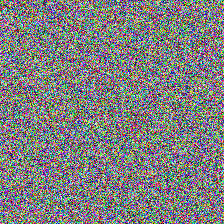

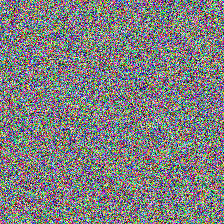

In [4]:
for i in range(2):
    display(ToPILImage()(random_input[i]))

In [5]:
imagewise_masked = grid_masking(random_input, batch_wise=False)
batchwise_masked = grid_masking(random_input, batch_wise=True)

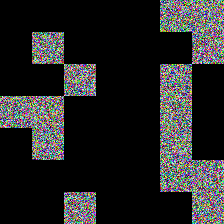

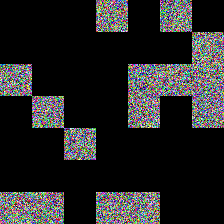

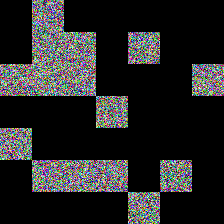

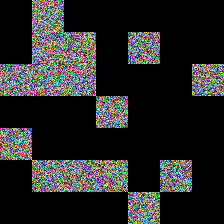

In [6]:
for i in range(2):
    display(ToPILImage()(imagewise_masked[i]))

for i in range(2):
    display(ToPILImage()(batchwise_masked[i]))

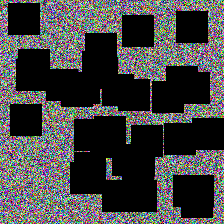

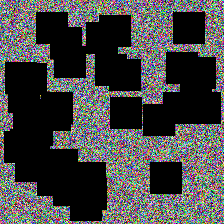

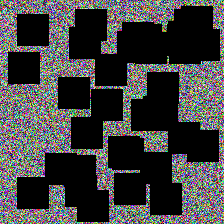

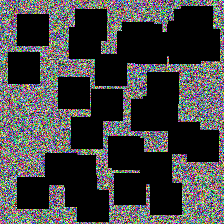

In [7]:
imagewise_masked = random_masking(random_input, batch_wise=False)
batchwise_masked = random_masking(random_input, batch_wise=True)
for i in range(2):
    display(ToPILImage()(imagewise_masked[i]))

for i in range(2):
    display(ToPILImage()(batchwise_masked[i]))

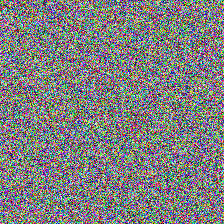

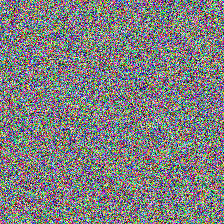

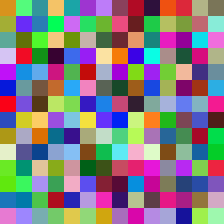

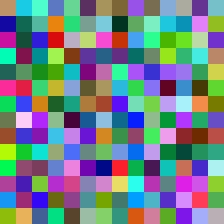

In [13]:
from datasets.transforms import SuperResolution
for i in range(2):
    display(ToPILImage()(random_input[i]))
    
sred = SuperResolution(16)(random_input)
for i in range(2):
    display(ToPILImage()(sred[i]))
    

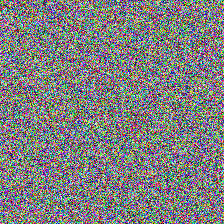

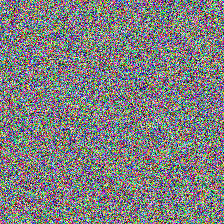

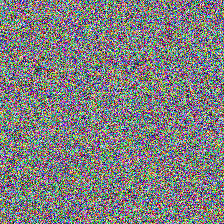

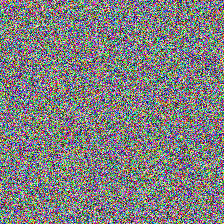

In [15]:
from datasets.transforms import Noise

for i in range(2):
    display(ToPILImage()(random_input[i]))
    
noised = Noise()(random_input)
for i in range(2):
    display(ToPILImage()(noised[i]))
    
